# Data Explorer for SHREC, PPAC, Ruth

In [1]:
!pip install numba
import sys
print(sys.executable)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numba
print(numba.__version__)

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [2]:
# Get data
dssd = pd.read_csv('processed_data/dssd_non_vetoed_events.csv') # non-vetoed, calibrated dssd events 
ppac = pd.read_csv('processed_data/ppac_events.csv')
ruth = pd.read_csv('processed_data/rutherford_events.csv')

In [3]:
# DSSD regions
imp = dssd[dssd['event_type'] == 'imp']
boxE = dssd[dssd['event_type'] == 'boxE']
boxW = dssd[dssd['event_type'] == 'boxW']
boxT = dssd[dssd['event_type'] == 'boxT']
boxB = dssd[dssd['event_type'] == 'boxB']

# PPAC 
cathode = ppac[ppac['detector'] == 'cathode']
anodeV = ppac[ppac['detector'] == 'anodeV']
anodeH = ppac[ppac['detector'] == 'anodeH']

# Rutherfords
ruth_E = ruth[ruth['detector'] == 'ruthE']
ruth_W = ruth[ruth['detector'] == 'ruthW']

In [4]:
def print_df_info(df, name):
    print(f"\n{'='*50}")
    print(f"{name.upper()} DATAFRAME SUMMARY")
    print(f"{'='*50}")
    print(f"Total Rows: {len(df)}")
    print("\nColumns:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col:<15} - {df[col].dtype}")
    print(f"\nFirst 5 Rows:\n{df.head()}")

In [5]:
# Print summaries

print_df_info(dssd, "DSSD")
print_df_info(ppac, "PPAC")
print_df_info(ruth, "Rutherford")
print_df_info(imp, "imp")


DSSD DATAFRAME SUMMARY
Total Rows: 1437503

Columns:
 1. t               - float64
 2. x               - int64
 3. y               - int64
 4. tagx            - int64
 5. tagy            - int64
 6. nfile           - int64
 7. tdelta          - int64
 8. nX              - int64
 9. nY              - int64
10. xE              - float64
11. yE              - float64
12. event_type      - object

First 5 Rows:
          t    x   y         tagx         tagy  nfile  tdelta  nX  nY  \
0  0.001173   37  51   1172537492   1172486495      0   50997   1   1   
1  0.002498  142   7   2498381995   2498317996      0   63999   1   1   
2  0.012275   99   2  12274781996  12274872000      0  -90004   1   1   
3  0.013692   80  13  13691736999  13691683118      0   53881   1   1   
4  0.048685   29  24  48685294463  48685229371      0   65092   2   1   

            xE           yE event_type  
0   542.836026   581.030040        imp  
1   372.607854   387.395788        imp  
2   288.692557   329.66294

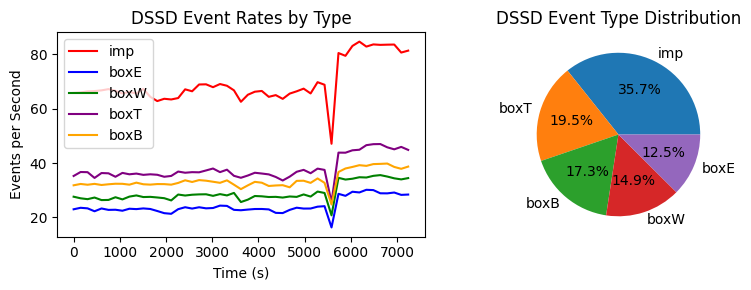

In [6]:
# Need to understand timing first
plt.figure(figsize=(12, 3))
plt.subplot(131)
for event_type, color in zip(['imp', 'boxE', 'boxW', 'boxT', 'boxB'], 
                              ['red', 'blue', 'green', 'purple', 'orange']):
    subset = dssd[dssd['event_type'] == event_type]
    bins = np.linspace(dssd['t'].min(), dssd['t'].max(), num=50)
    event_counts, _ = np.histogram(subset['t'], bins=bins)
    time_intervals = np.diff(bins)
    events_per_second = event_counts / time_intervals
    plt.plot(bins[:-1], events_per_second, label=event_type, color=color)

plt.title('DSSD Event Rates by Type')
plt.xlabel('Time (s)')
plt.ylabel('Events per Second')
plt.legend()

# Event type distribution pie chart
plt.subplot(132)
event_counts = dssd['event_type'].value_counts()
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%')
plt.title('DSSD Event Type Distribution')

plt.tight_layout()
plt.show()



In [7]:
# # Need to understand timing first
# plt.figure(figsize=(12, 3))
# plt.subplot(131)
# for event_type, color in zip(['cathode', 'anodeV', 'anodeH'], 
#                               ['red', 'blue', 'green', 'purple', 'orange']):
#     subset = ppac[ppac['detector'] == event_type]
#     bins = np.linspace(dssd['t'].min(), dssd['t'].max(), num=50)
#     event_counts, _ = np.histogram(subset['t'], bins=bins)
#     time_intervals = np.diff(bins)
#     events_per_second = event_counts / time_intervals
#     plt.plot(bins[:-1], events_per_second, label=event_type, color=color)

# plt.title('PPAC Event Rates by Type')
# plt.xlabel('Time (s)')
# plt.ylabel('Events per Second')
# plt.legend()

# # Event type distribution pie chart
# plt.subplot(132)
# event_counts = ppac['detector'].value_counts()
# plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%')
# plt.title('PPAC Event Type Distribution')

# plt.tight_layout()
# plt.show()


In [8]:
# tfile = math.ceil(max(cathode['timetag'])*1e-12)
# plt.hist(cathode['timetag']*1e-12, bins = np.arange(0, tfile, 1), histtype = 'step', color = '#660099', label = 'cathode')
# plt.hist(anodeV['timetag']*1e-12, bins = np.arange(0, tfile, 1), histtype = 'step', color = '#999999', label = 'anode V')
# plt.hist(anodeH['timetag']*1e-12, bins = np.arange(0, tfile, 1), histtype = 'step', color = '#007681', label = 'anode H')
# plt.legend()
# plt.xlabel('time [s]')
# plt.ylabel('rate [Hz]')
# plt.show()

In [9]:
# plt.hist2d(coincident_imp['imp_xE'], coincident_imp['imp_x'], bins=(2000, 174), range=((0,20000),(1,174)), cmin=1)
# plt.show()

In [10]:
# PPAC-IMP Coincidence Analysis using raw timetag values (picoseconds)
# Looking for coincidences around IMP events with window defined in nanoseconds

# Define the coincidence window in nanoseconds
window_before_ns = 5000  # 2000 ns (2 us) before
window_after_ns = 5000   # 1000 ns (1 us) after

# Convert to picoseconds for use with timetag values
window_before_ps = window_before_ns * 1000  # ns → ps
window_after_ps = window_after_ns * 1000    # ns → ps

print(f"Using coincidence window: {window_before_ns} ns before to {window_after_ns} ns after IMP event")
print(f"Window in picoseconds: {window_before_ps} ps before to {window_after_ps} ps after")

# Sort dataframes by timetag for faster searching
cathode_sorted = cathode.sort_values('timetag').reset_index(drop=True)
anodeV_sorted = anodeV.sort_values('timetag').reset_index(drop=True)
anodeH_sorted = anodeH.sort_values('timetag').reset_index(drop=True)
imp_sorted = imp.sort_values('tagx').reset_index(drop=True)  # Using tagx for IMP

# Extract timetag arrays for faster processing
cathode_timetags = cathode_sorted['timetag'].values
anodeV_timetags = anodeV_sorted['timetag'].values
anodeH_timetags = anodeH_sorted['timetag'].values
imp_timetags = imp_sorted['tagx'].values  # Using tagx as the IMP timetag

# Define function to find PPAC events within the time window
def find_events_in_window(imp_timetag, detector_timetags, window_before_ps, window_after_ps):
    """
    Find detector events that occur within a time window around the IMP event.
    All time values are in picoseconds.
    
    Parameters:
    -----------
    imp_timetag : int
        Timestamp of the IMP event in picoseconds
    detector_timetags : array
        Array of detector timestamps in picoseconds
    window_before_ps : int
        Time window before the IMP event in picoseconds
    window_after_ps : int
        Time window after the IMP event in picoseconds
        
    Returns:
    --------
    list
        Indices of events within the window
    """
    # Calculate the time bounds
    lower_bound = imp_timetag - window_before_ps  # Time window before IMP
    upper_bound = imp_timetag + window_after_ps   # Time window after IMP
    
    # Find all events within these bounds using binary search for efficiency
    lower_idx = np.searchsorted(detector_timetags, lower_bound)
    upper_idx = np.searchsorted(detector_timetags, upper_bound)
    
    if upper_idx > lower_idx:
        return list(range(lower_idx, upper_idx))
    return []

# Start timing the process
import time as time_module
start_time = time_module.time()

# Create a list to store coincident events
coincident_events = []

# Number of IMP events to process
total_imp_events = len(imp_sorted)
print(f"Processing {total_imp_events} IMP events...")

# For each IMP event, find coincident PPAC signals
for idx, imp_row in imp_sorted.iterrows():
    imp_timetag = imp_row['tagx']
    
    # Find events in each PPAC detector within the time window
    cathode_indices = find_events_in_window(imp_timetag, cathode_timetags, window_before_ps, window_after_ps)
    anodeV_indices = find_events_in_window(imp_timetag, anodeV_timetags, window_before_ps, window_after_ps)
    anodeH_indices = find_events_in_window(imp_timetag, anodeH_timetags, window_before_ps, window_after_ps)
    
    # Only proceed if we have coincidences in all three PPAC detectors
    if cathode_indices and anodeV_indices and anodeH_indices:
        # Find the closest event in each detector (smallest absolute time difference)
        cathode_diffs = np.abs(cathode_timetags[cathode_indices] - imp_timetag)
        anodeV_diffs = np.abs(anodeV_timetags[anodeV_indices] - imp_timetag)
        anodeH_diffs = np.abs(anodeH_timetags[anodeH_indices] - imp_timetag)
        
        closest_cathode_idx = cathode_indices[np.argmin(cathode_diffs)]
        closest_anodeV_idx = anodeV_indices[np.argmin(anodeV_diffs)]
        closest_anodeH_idx = anodeH_indices[np.argmin(anodeH_diffs)]
        
        # Get the corresponding rows
        cathode_data = cathode_sorted.iloc[closest_cathode_idx]
        anodeV_data = anodeV_sorted.iloc[closest_anodeV_idx]
        anodeH_data = anodeH_sorted.iloc[closest_anodeH_idx]
        
        # Calculate time difference values (in picoseconds)
        # Positive: PPAC after IMP, Negative: PPAC before IMP
        dt_cathode_ps = cathode_data['timetag'] - imp_timetag
        dt_anodeV_ps = anodeV_data['timetag'] - imp_timetag
        dt_anodeH_ps = anodeH_data['timetag'] - imp_timetag
        
        # Create event data dictionary with all relevant information
        event_data = {
            # IMP data
            'imp_timetag': imp_timetag,
            'imp_x': imp_row['x'],
            'imp_y': imp_row['y'],
            'imp_tagx': imp_row['tagx'],
            'imp_tagy': imp_row['tagy'],
            'imp_nfile': imp_row['nfile'],
            'imp_tdelta': imp_row['tdelta'],
            'imp_nX': imp_row['nX'],
            'imp_nY': imp_row['nY'],
            'imp_xE': imp_row['xE'],
            'imp_yE': imp_row['yE'],
            
            # Cathode data
            'cathode_timetag': cathode_data['timetag'],
            'cathode_energy': cathode_data['energy'],
            'cathode_board': cathode_data['board'],
            'cathode_channel': cathode_data['channel'],
            'cathode_nfile': cathode_data['nfile'],
            
            # AnodeV data
            'anodeV_timetag': anodeV_data['timetag'],
            'anodeV_energy': anodeV_data['energy'],
            'anodeV_board': anodeV_data['board'],
            'anodeV_channel': anodeV_data['channel'],
            'anodeV_nfile': anodeV_data['nfile'],
            
            # AnodeH data
            'anodeH_timetag': anodeH_data['timetag'],
            'anodeH_energy': anodeH_data['energy'],
            'anodeH_board': anodeH_data['board'],
            'anodeH_channel': anodeH_data['channel'],
            'anodeH_nfile': anodeH_data['nfile'],
            
            # Time difference values (in picoseconds)
            'dt_cathode_ps': dt_cathode_ps,
            'dt_anodeV_ps': dt_anodeV_ps,
            'dt_anodeH_ps': dt_anodeH_ps,
            
            # Convert to nanoseconds for convenience
            'dt_cathode_ns': dt_cathode_ps / 1000,
            'dt_anodeV_ns': dt_anodeV_ps / 1000,
            'dt_anodeH_ns': dt_anodeH_ps / 1000
        }
        
        coincident_events.append(event_data)
    
    # Print progress every 10,000 events
    if idx % 10000 == 0 and idx > 0:
        elapsed = time_module.time() - start_time
        events_per_sec = idx / elapsed
        remaining_time = (total_imp_events - idx) / events_per_sec if events_per_sec > 0 else 0
        print(f"Processed {idx}/{total_imp_events} events ({idx/total_imp_events*100:.1f}%) - Rate: {events_per_sec:.1f} events/sec - ETA: {remaining_time:.1f} sec")

# Create the dataframe with coincident events
coincident_imp = pd.DataFrame(coincident_events)
print(f"Found {len(coincident_imp)} coincidences within the window")

# Calculate total processing time
elapsed_time = time_module.time() - start_time
print(f"Total processing time: {elapsed_time:.2f} seconds")
print(f"Processing rate: {total_imp_events/elapsed_time:.1f} events/second")



Using coincidence window: 5000 ns before to 5000 ns after IMP event
Window in picoseconds: 5000000 ps before to 5000000 ps after
Processing 513316 IMP events...
Processed 10000/513316 events (1.9%) - Rate: 9604.0 events/sec - ETA: 52.4 sec
Processed 20000/513316 events (3.9%) - Rate: 10524.0 events/sec - ETA: 46.9 sec
Processed 30000/513316 events (5.8%) - Rate: 10776.6 events/sec - ETA: 44.8 sec
Processed 40000/513316 events (7.8%) - Rate: 10963.5 events/sec - ETA: 43.2 sec
Processed 50000/513316 events (9.7%) - Rate: 11085.5 events/sec - ETA: 41.8 sec
Processed 60000/513316 events (11.7%) - Rate: 11062.0 events/sec - ETA: 41.0 sec
Processed 70000/513316 events (13.6%) - Rate: 11118.7 events/sec - ETA: 39.9 sec
Processed 80000/513316 events (15.6%) - Rate: 11068.4 events/sec - ETA: 39.1 sec
Processed 90000/513316 events (17.5%) - Rate: 11122.1 events/sec - ETA: 38.1 sec
Processed 100000/513316 events (19.5%) - Rate: 11165.0 events/sec - ETA: 37.0 sec
Processed 110000/513316 events (21


Time Difference Statistics (ns):
dt_cathode_ns:
  Mean: -1448.04 ns
  Std Dev: 322.83 ns
  Min: -4996.94 ns
  Max: 4985.74 ns
dt_anodeV_ns:
  Mean: -1442.07 ns
  Std Dev: 323.59 ns
  Min: -4937.24 ns
  Max: 4994.88 ns
dt_anodeH_ns:
  Mean: -1442.37 ns
  Std Dev: 324.24 ns
  Min: -4998.99 ns
  Max: 4991.08 ns

PPAC cathode before IMP: 110568 events (99.6%)
PPAC cathode after IMP: 499 events (0.4%)


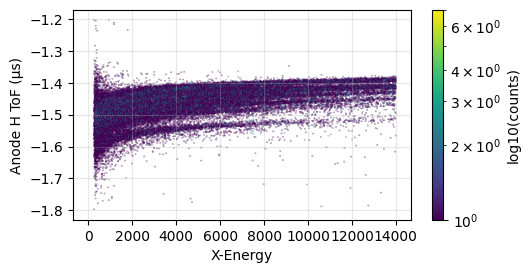

In [11]:
# Display time difference statistics in nanoseconds
if not coincident_imp.empty:
    # Convert nanosecond time differences to microseconds for plotting
    coincident_imp['dt_cathode_us'] = coincident_imp['dt_cathode_ns'] / 1000  # ns → μs
    coincident_imp['dt_anodeV_us'] = coincident_imp['dt_anodeV_ns'] / 1000    # ns → μs
    coincident_imp['dt_anodeH_us'] = coincident_imp['dt_anodeH_ns'] / 1000    # ns → μs
    print("\nTime Difference Statistics (ns):")
    for dt_col in ['dt_cathode_ns', 'dt_anodeV_ns', 'dt_anodeH_ns']:
        print(f"{dt_col}:")
        print(f"  Mean: {coincident_imp[dt_col].mean():.2f} ns")
        print(f"  Std Dev: {coincident_imp[dt_col].std():.2f} ns")
        print(f"  Min: {coincident_imp[dt_col].min():.2f} ns")
        print(f"  Max: {coincident_imp[dt_col].max():.2f} ns")
    
    # Count events with PPAC before vs after IMP
    before_count = (coincident_imp['dt_cathode_ns'] < 0).sum()
    after_count = (coincident_imp['dt_cathode_ns'] >= 0).sum()
    print(f"\nPPAC cathode before IMP: {before_count} events ({before_count/len(coincident_imp)*100:.1f}%)")
    print(f"PPAC cathode after IMP: {after_count} events ({after_count/len(coincident_imp)*100:.1f}%)")

    # Create visualization of energy vs time differences
    plt.figure(figsize=(12, 6))

#     # 1. XE vs tof in us
#     plt.subplot(221)
#     plt.scatter(coincident_imp['imp_xE'], coincident_imp['dt_anodeH_us'], 
#                 alpha=0.2, s=1, c='blue')
#     plt.ylabel('Anode H ToF (μs)')
#     plt.xlabel('X-Energy')
#     plt.grid(True, alpha=0.1)
#     plt.ylim(-1.8, -1.3)
#     plt.xlim(0,14000)
#     plt.tight_layout()
    
#     plt.subplot(222)
#     plt.scatter(coincident_imp['imp_xE'], coincident_imp['dt_cathode_us'], 
#                 alpha=0.2, s=1, c='blue')
#     plt.ylabel('Cathode ToF (μs)')
#     plt.xlabel('X-Energy')
#     plt.grid(True, alpha=0.1)
#     plt.ylim(-1.8, -1.3)
#     plt.xlim(0,14000)
#     plt.tight_layout()
    
    plt.subplot(223)
    hexbin = plt.hexbin(coincident_imp['imp_xE'], coincident_imp['dt_anodeH_us'], 
                       gridsize=1400,  # Number of hexagons across the x-direction
                       extent=(0, 14000, -1.8, -1.2),  # (xmin, xmax, ymin, ymax)
                       bins='log',    # Use log scale for counts
                       cmap='viridis',
                       mincnt=1)      # Minimum count to display a hexagon
    plt.xlabel('X-Energy')
    plt.ylabel('Anode H ToF (μs)')
    plt.grid(True, alpha=0.3)
    plt.colorbar(hexbin, label='log10(counts)')
    plt.show()

else:
    print("No coincidences found!")

In [12]:
# ALpha correlations
print(coincident_imp.head())

    imp_timetag  imp_x  imp_y      imp_tagx      imp_tagy  imp_nfile  \
0   13691736999     80     13   13691736999   13691683118          0   
1   48685294463     29     25   48685294463   48685235622          0   
2   48685294463     29     24   48685294463   48685229371          0   
3  144198116872     31     49  144198116872  144198070123          0   
4  249800704561     82      8  249800704561  249800644680          0   

   imp_tdelta  imp_nX  imp_nY       imp_xE  ...  anodeH_nfile  dt_cathode_ps  \
0       53881       1       1  2128.318716  ...             0       -1473350   
1       58841       2       1  6401.664726  ...             0       -1448783   
2       65092       2       1  6401.664726  ...             0       -1448783   
3       46749       1       1  2173.109228  ...             0       -1472841   
4       59881       1       1  9266.866625  ...             0       -1442746   

   dt_anodeV_ps  dt_anodeH_ps  dt_cathode_ns  dt_anodeV_ns  dt_anodeH_ns  \
0      -14

In [13]:
# import numpy as np
# import pandas as pd

# # Sort the imp dataframe by its time column ('t') in ascending order.
# imp = imp.sort_values('t').reset_index(drop=True)

# # Sort the coincident_imp dataframe by the recoil time.
# # Note: recoil time is in picoseconds in the 'imp_timetag' column.
# coincident_imp = coincident_imp.sort_values('imp_timetag').reset_index(drop=True)


# # --- Parameters for the alpha decay time window ---
# # Define the window in seconds and convert to microseconds (1 s = 1e6 µs)
# alpha_min_time_s = 0.1     # Minimum time after recoil to consider (in seconds)
# alpha_max_time_s = 10    # Maximum time after recoil (in seconds)
# alpha_min_us = alpha_min_time_s * 1e6
# alpha_max_us = alpha_max_time_s * 1e6

# # --- Build pixel history from the imp dataframe ---
# # Group the imp dataframe by pixel coordinates (x, y).
# # The imp dataframe is assumed to be time-ordered based on the 't' column.
# pixel_groups = imp.groupby(['x', 'y'])

# # Build a dictionary mapping each pixel (x, y) to its corresponding time-ordered DataFrame.
# pixel_history = {pixel: group for pixel, group in pixel_groups}

# # --- Find candidate alpha events ---
# # The coincident_imp dataframe contains recoil events.
# # For each recoil event, we'll search for subsequent events in the same pixel from imp.
# alpha_candidates = []  # This list will store DataFrames of candidate alpha events.

# for recoil_idx, recoil in coincident_imp.iterrows():
#     # Determine the pixel for the recoil event using the 'imp_x' and 'imp_y' columns.
#     pixel = (recoil['imp_x'], recoil['imp_y'])
    
#     # Convert the recoil's imp_timetag from picoseconds to microseconds.
#     recoil_time_us = recoil['imp_timetag'] / 1e6
    
#     # Check if there are any events in the same pixel in the imp dataframe.
#     if pixel not in pixel_history:
        
#         continue  # Skip if no events are found for this pixel.
    
#     # Retrieve the time-ordered events for this pixel.
#     pixel_df = pixel_history[pixel]
    
#     # Get the 't' values (in µs) as a sorted NumPy array.
#     time_array = pixel_df['t'].values
    
#     # Define the lower and upper bounds for candidate alpha events.
#     lower_bound = recoil_time_us + alpha_min_us
#     upper_bound = recoil_time_us + alpha_max_us
    
#     # Use binary search to find the index positions in the time_array.
#     start_idx = np.searchsorted(time_array, lower_bound, side='left')
#     end_idx = np.searchsorted(time_array, upper_bound, side='right')
    
#     # If events exist in the window, add them as candidate alpha events.
#     if start_idx < end_idx:
#         candidate_events = pixel_df.iloc[start_idx:end_idx].copy()
#         # Record the associated recoil information for later reference.
#         candidate_events['recoil_index'] = recoil_idx
#         candidate_events['recoil_time_us'] = recoil_time_us
#         alpha_candidates.append(candidate_events)

# # Combine all candidate alpha events into a single DataFrame.
# if alpha_candidates:
#     alpha_candidates_df = pd.concat(alpha_candidates, ignore_index=True)
# else:
#     alpha_candidates_df = pd.DataFrame()

# # Display the first few candidate alpha events.
# print(alpha_candidates_df.head())


In [14]:
import numpy as np
import pandas as pd

# --- Ensure time-ordering of dataframes ---
# imp: Implant events (t is in seconds)
imp = imp.sort_values('t').reset_index(drop=True)
# coincident_imp: Recoil events (imp_timetag is in picoseconds)
coincident_imp = coincident_imp.sort_values('imp_timetag').reset_index(drop=True)

# --- Parameters for the alpha decay time window (in seconds) ---
alpha_min_time_s = 0.0001     # Minimum time after recoil to consider (in seconds)
alpha_max_time_s = 7.7     # Maximum time after recoil to consider (in seconds)

# --- Build pixel history from the imp dataframe ---
# Group the full implant event history by pixel coordinates (x, y)
pixel_groups = imp.groupby(['x', 'y'])
pixel_history = {pixel: group for pixel, group in pixel_groups}

# --- Find candidate alpha events ---
# The coincident_imp dataframe contains recoil events.
# For each recoil event, we'll search for subsequent events in the same pixel from imp.
alpha_candidates = []  # List to store DataFrames of candidate alpha events

for recoil_idx, recoil in coincident_imp.iterrows():
    # Determine the pixel for the recoil event using 'imp_x' and 'imp_y'
    pixel = (recoil['imp_x'], recoil['imp_y'])
    
    # Convert the recoil's imp_timetag from picoseconds to seconds.
    recoil_time_sec = recoil['imp_timetag'] / 1e12
    
    # Check if there are any events in the same pixel in the imp dataframe.
    if pixel not in pixel_history:
        continue  # Skip if no events are found for this pixel.
    
    # Retrieve the time-ordered events for this pixel from imp.
    pixel_df = pixel_history[pixel]
    
    # Get the 't' values (in seconds) as a sorted NumPy array.
    time_array = pixel_df['t'].values
    
    # Define the lower and upper bounds for candidate alpha events in seconds.
    lower_bound = recoil_time_sec + alpha_min_time_s
    upper_bound = recoil_time_sec + alpha_max_time_s
    
    # Use binary search to find the index positions in the time_array.
    start_idx = np.searchsorted(time_array, lower_bound, side='left')
    end_idx = np.searchsorted(time_array, upper_bound, side='right')
    
    # If events exist in the window, add them as candidate alpha events.
    if start_idx < end_idx:
        candidate_events = pixel_df.iloc[start_idx:end_idx].copy()
        # Record the associated recoil information for later reference.
        candidate_events['recoil_index'] = recoil_idx
        candidate_events['recoil_time_sec'] = recoil_time_sec
        alpha_candidates.append(candidate_events)

# Combine all candidate alpha events into a single DataFrame.
if alpha_candidates:
    alpha_candidates_df = pd.concat(alpha_candidates, ignore_index=True)
else:
    alpha_candidates_df = pd.DataFrame()

# Display the first few candidate alpha events.
print(alpha_candidates_df.head())


           t   x   y            tagx            tagy  nfile  tdelta  nX  nY  \
0   8.687956  44  49   8687955632004   8687955664003      0  -31999   1   1   
1   5.053563  18   6   5053563376005   5053563200001      0  176004   1   1   
2   6.452244   1  12   6452244162993   6452244115993      0   47000   1   2   
3   7.341375   5   6   7341374909494   7341374867187      0   42307   1   1   
4  13.292555   5   6  13292554760996  13292554793995      0  -32999   1   1   

            xE           yE event_type  recoil_index  recoil_time_sec  
0   334.541983   355.716979        imp            52         4.073180  
1   289.114464   359.805537        imp            55         4.598866  
2   865.410811   574.482571        imp            61         4.716802  
3  3865.706690  3916.650417        imp            82         6.369336  
4   276.035476   359.805537        imp            82         6.369336  


In [15]:
alpha_candidates_df['log_dt'] = np.log(abs(alpha_candidates_df['t'] - alpha_candidates_df['recoil_time_sec']))

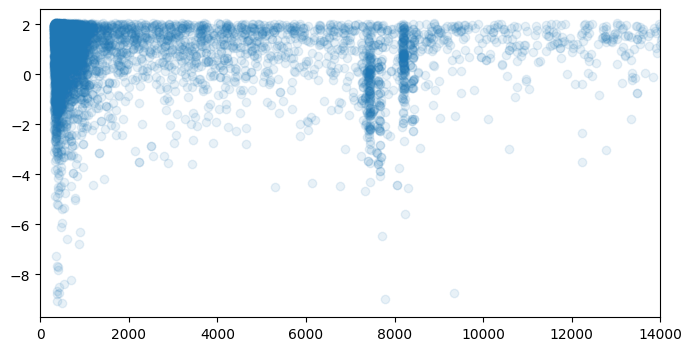

In [16]:
plt.figure(figsize=(8,4))
plt.scatter(alpha_candidates_df['yE'], alpha_candidates_df['log_dt'], alpha=0.1)
plt.xlim(0,14000)
plt.show()

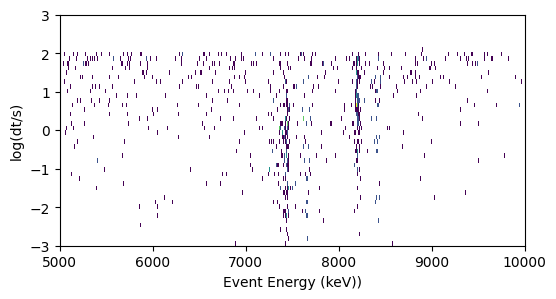

In [17]:
plt.figure(figsize=(6,3))
plt.hist2d(alpha_candidates_df['yE'], alpha_candidates_df['log_dt'], 
           bins=((500),(50)), range=((5000,10000),(-3,3)), cmin=1)
plt.xlabel('Event Energy (keV))')
plt.ylabel(r'log(dt/s)')
plt.show()

/tmp/ipykernel_40132/3657848527.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


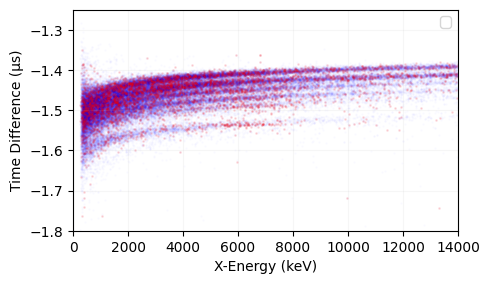

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Map dt_anodeH_us from coincident_imp to alpha candidates using the recoil_index.
# Make sure coincident_imp is indexed by its default integer index.
alpha_candidates_df['dt_anodeH_us'] = alpha_candidates_df['recoil_index'].map(coincident_imp.set_index(coincident_imp.index)['dt_anodeH_us'])

# Filter recoils to only those that have an associated alpha candidate.
recoil_indices_with_alpha = alpha_candidates_df['recoil_index'].unique()
recoils_with_alpha = coincident_imp.loc[recoil_indices_with_alpha]

plt.figure(figsize=(5,3))
plt.scatter(coincident_imp['imp_xE'], coincident_imp['dt_anodeH_us'], 
            alpha=0.01, s=1, c='blue')
plt.scatter(recoils_with_alpha['imp_xE'], recoils_with_alpha['dt_anodeH_us'], 
            alpha=0.1, s=1, c='r')
plt.ylabel('Anode H ToF (μs)')
plt.xlabel('X-Energy')
plt.grid(True, alpha=0.1)
plt.ylim(-1.8, -1.3)
plt.xlim(0,14000)
plt.tight_layout()


plt.xlabel('X-Energy (keV)')
plt.ylabel('Time Difference (μs)')
plt.xlim(0, 14000)
plt.ylim(-1.8,-1.25)
plt.legend()
plt.show()


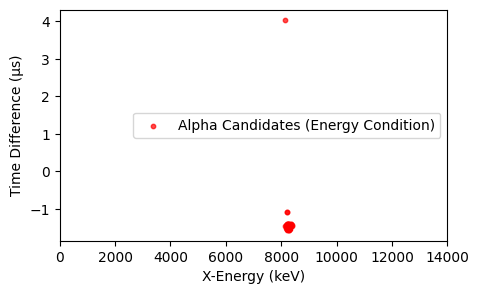

In [22]:
# --- Set an energy condition on the candidate alphas ---
energy_min = 8100    # Minimum energy (keV)
energy_max = 8400   # Maximum energy (keV)

# Filter the alpha_candidates_df using the energy condition on xE.
filtered_alpha_candidates = alpha_candidates_df[(alpha_candidates_df['xE'] >= energy_min) & 
                                                (alpha_candidates_df['xE'] <= energy_max)].copy()

# Map dt_anodeH_us from coincident_imp to the candidate alphas using recoil_index.
# Here, we assume coincident_imp is indexed by its default integer index.
filtered_alpha_candidates['dt_anodeH_us'] = filtered_alpha_candidates['recoil_index'].map(
    coincident_imp.set_index(coincident_imp.index)['dt_anodeH_us'])

# Filter recoil events to only those that have an associated alpha candidate.
recoil_indices_with_alpha = filtered_alpha_candidates['recoil_index'].unique()
recoils_with_alpha = coincident_imp.loc[recoil_indices_with_alpha]

plt.figure(figsize=(5,3))
plt.scatter(filtered_alpha_candidates['xE'], filtered_alpha_candidates['dt_anodeH_us'],
            s=10, color='red', alpha=0.7, label='Alpha Candidates (Energy Condition)')

plt.xlabel('X-Energy (keV)')
plt.ylabel('Time Difference (μs)')
plt.xlim(0, 14000)
plt.legend()
plt.show()

              t    x   y             tagx             tagy  nfile  tdelta  nX  \
14    14.352003  165  22   14352002766218   14352002624150      0  142068   1   
73    68.423917  124   3   68423916798836   68423916715182      0   83654   1   
77    73.274142  152  31   73274141898029   73274141825277      0   72752   1   
94    86.317231  106  23   86317230570808   86317230520059      0   50749   1   
136  122.689336  122   3  122689335537714  122689335455311      0   82403   2   

     nY           xE           yE event_type  recoil_index  recoil_time_sec  \
14    1  8294.670750  8198.977629        imp           175        12.344037   
73    1  8269.083566  8228.582359        imp           964        67.786658   
77    1  8283.577534  8212.405090        imp          1032        72.520494   
94    1  8263.513664  8210.273046        imp          1239        85.148280   
136   1  8213.135518  8354.097310        imp          1797       121.265571   

       log_dt  dt_anodeH_us  
14   0.6

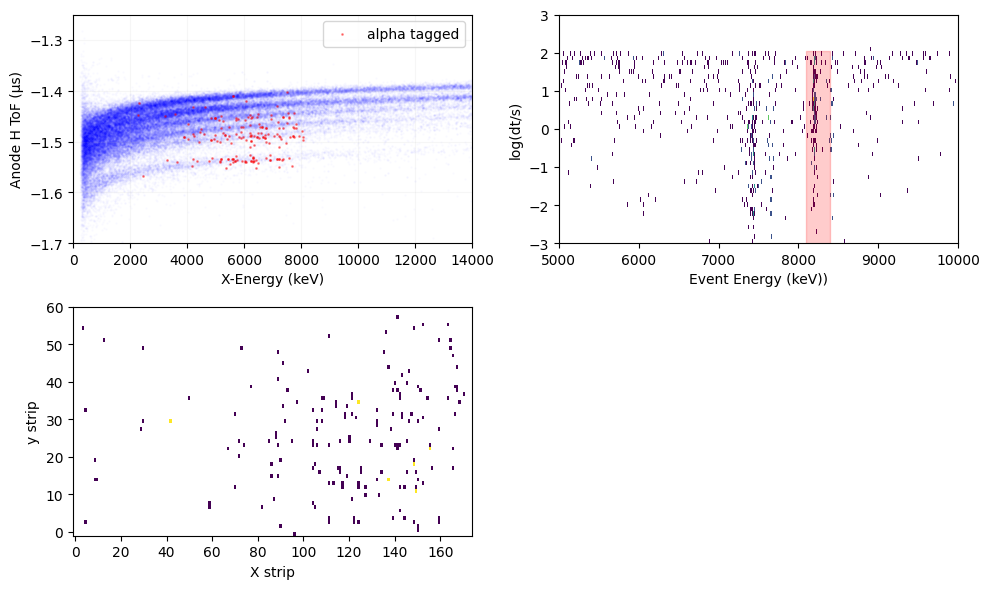

In [28]:

filtered_alpha_candidates['dt_anodeH_us'] = filtered_alpha_candidates['recoil_index'].map(
    coincident_imp.set_index(coincident_imp.index)['dt_anodeH_us']
)

print(filtered_alpha_candidates.head())

# Filter recoils: extract the unique recoil indices from the energy-filtered candidate alphas.
recoil_indices_with_alpha_filtered = filtered_alpha_candidates['recoil_index'].unique()
recoils_with_alpha_filtered = coincident_imp.loc[recoil_indices_with_alpha_filtered]


# Set energy gate for recoils now:
energy_lower_bound = 2000
energy_upper_bound = 8099
recoils_with_alpha_filtered = recoils_with_alpha_filtered[
    (recoils_with_alpha_filtered['imp_xE'] >= energy_lower_bound) &
    (recoils_with_alpha_filtered['imp_xE'] <= energy_upper_bound)
]

plt.figure(figsize=(10,6))

plt.subplot(221)
plt.scatter(coincident_imp['imp_xE'], coincident_imp['dt_anodeH_us'], 
            alpha=0.01, s=1, c='blue', label='')
# Overlay the recoil events that have an energy-filtered alpha candidate (red)
plt.scatter(recoils_with_alpha_filtered['imp_xE'], recoils_with_alpha_filtered['dt_anodeH_us'], 
            alpha=0.4, s=1, c='red', label='alpha tagged')
plt.xlabel('X-Energy (keV)')
plt.ylabel('Anode H ToF (μs)')
plt.xlim(0,14000)
plt.ylim(-1.7,-1.25)
plt.grid(True, alpha=0.1)
plt.legend()

plt.subplot(222)
plt.hist2d(alpha_candidates_df['yE'], alpha_candidates_df['log_dt'], 
           bins=((500),(50)), range=((5000,10000),(-3,3)), cmin=1)
plt.fill_betweenx(y=[np.log(alpha_min_time_s), np.log(alpha_max_time_s)], x1=energy_min, x2=energy_max, 
                  color='red', alpha=0.2, label='Energy Gate')
plt.xlabel('Event Energy (keV))')
plt.ylabel(r'log(dt/s)')

plt.subplot(223)
plt.hist2d(recoils_with_alpha_filtered['imp_x'], recoils_with_alpha_filtered['imp_y'], 
           bins=((174),(59)), range=((-1,174),(-1,60)), cmin=1)
plt.xlabel('X strip')
plt.ylabel(r'y strip')




plt.tight_layout()
plt.show()

In [24]:
print(len(recoils_with_alpha_filtered))

175
